# Overview of the project

# Objective of the project

# Loading and Preprocessing

In [1]:
#Importing all libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


In [3]:
iris=load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data['species'] = iris.target

In [8]:
print("Dataset with Species Column:")
print(data.head())

Dataset with Species Column:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [9]:
# Drop the species column
data_features = data.drop(columns=['species'])
data_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
data_features.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
data_features.duplicated().sum()

1

In [13]:
#Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

In [14]:
data_scaled_df = pd.DataFrame(data_scaled, columns=iris.feature_names) #Converting to data frame

# Clustering Algorithm Implementation

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

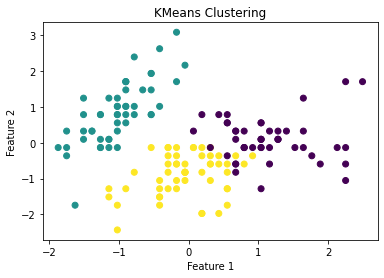

In [29]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [17]:
#Elbow method
max_clusters=10
ss=[]

In [18]:
for k in range(2, max_clusters + 1):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
   

In [19]:
score=silhouette_score(data_scaled,kmeans.labels_)
ss.append(score)

In [20]:
#Find optimal number of clusters
optimal_clusters=ss.index(max(ss))+2

In [24]:
#Final K-Means with optimal clusters
kmeans=KMeans(n_clusters=optimal_clusters, random_state=42)
data_features['Cluster']=kmeans.fit_predict(data_scaled)

In [25]:
data_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [26]:
data_features['Cluster'].unique()

array([1, 0])

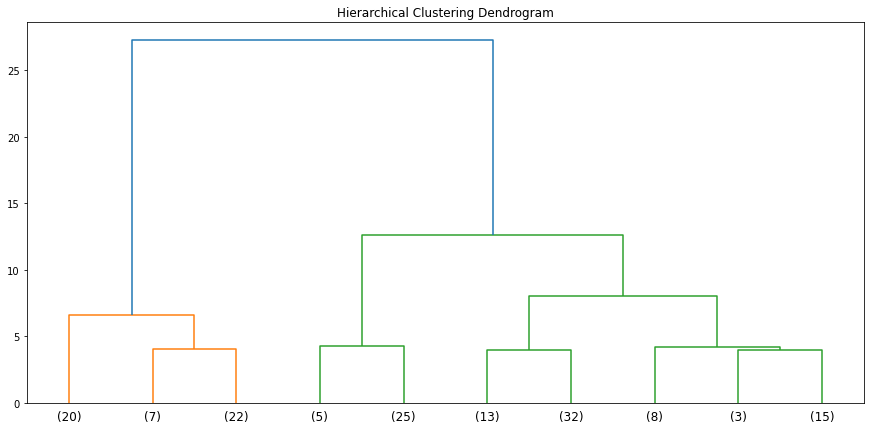

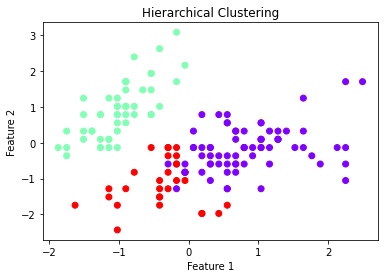

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3)
clusters_hc = hc.fit_predict(data_scaled)

# Visualize clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_hc, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()